In [17]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex. tools import input_factory


In [18]:
v_rest= -75*b2.mV #EL
v_reset= -80*b2.mV #Vreset
membrane_resistance = 100*b2.Mohm #RM
membrane_capacitance = 100*b2.pF #CM
firing_threshold = -50 * b2.mV #VL

E_k = -80*b2.mV

tau_Gref = 200*b2.ms
deltaG = 1*b2.nsiemens
Gref_0 = 0*b2.nsiemens

simulation_time = 1500
dt =  0.01 * b2.ms 

#current = 200.01 * b2.pamp
current = 500
input_current = input_factory.get_step_current(
t_start=500, t_end=1000, unit_time=b2.ms,
amplitude=current*b2.pA) 
# differential equation 
eqs = """
dGref/dt = -Gref/tau_Gref : siemens
dv/dt =
    ( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) )
    + (Gref *(E_k - v))/membrane_capacitance 
    + (input_current(t,i)/membrane_capacitance) ) : volt
"""

# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    1, model=eqs, reset="v=v_reset; Gref=Gref+deltaG", 
    threshold="v>firing_threshold",
    refractory=False, method="euler")
neuron.v = v_rest  # set initial value
neuron.Gref = Gref_0

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "Gref"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)
 
print("nr of spikes: {}".format(spike_monitor.count[0]))
#print("spikes times: {}".format(spike_monitor.t[:]))


nr of spikes: 27


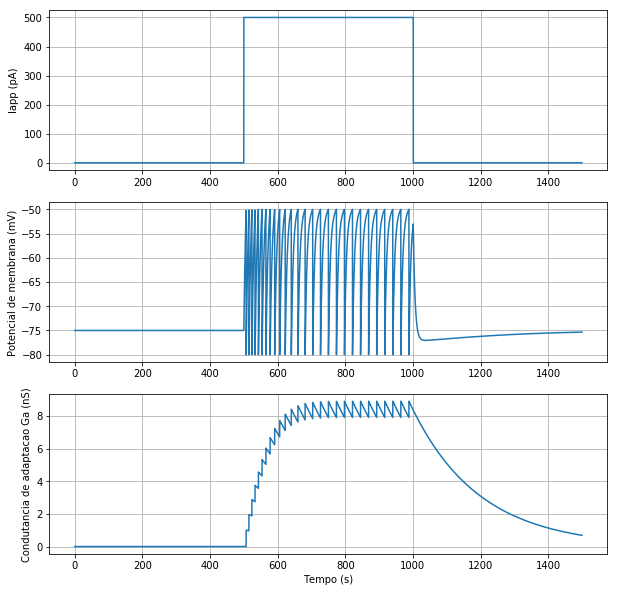

In [19]:
#plot
fig = plt.figure(figsize=(10,10))

fig.add_subplot(3,1,1)
c = input_current(state_monitor.t, 0)
plt.plot(state_monitor.t/b2.ms, c/b2.pA )
plt.ylabel('Iapp (pA)')
plt.grid()

fig.add_subplot(3,1,2)
plt.plot(state_monitor.t/b2.ms, state_monitor.v[0]/b2.mV)

plt.ylabel('Potencial de membrana (mV)')
plt.grid()
#plt.legend(["vm", "firing threshold"], fontsize=12)

fig.add_subplot(3,1,3)
plt.plot(state_monitor.t/b2.ms, state_monitor.Gref[0]/b2.nsiemens)
plt.grid()
plt.xlabel('Tempo (s)')
plt.ylabel('Condutancia de adaptacao Ga (nS)')

plt.show()

In [20]:
v_rest= -75*b2.mV #EL
v_reset= -80*b2.mV #Vreset
membrane_resistance = 100*b2.Mohm #RM
membrane_capacitance = 100*b2.pF #CM
firing_threshold = -50 * b2.mV #VL

E_k = -80*b2.mV

tau_Gref = 200*b2.ms
deltaG = 1*b2.nsiemens
Gref_0 = 0*b2.nsiemens

simulation_time = 5
dt =  0.01 * b2.ms 

current = np.arange(280, 600, 10)

eqs = """
dGref/dt = -Gref/tau_Gref : siemens
dv/dt = ( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) )
        + (Gref *(E_k - v))/membrane_capacitance
        + (current/membrane_capacitance) ) : volt
current : amp
"""
# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    len(current), model=eqs, reset="v=v_reset; Gref=Gref+deltaG", 
    threshold="v>firing_threshold",
    refractory=False, method="euler")
neuron.v = v_rest  # set initial value
neuron.Gref = Gref_0
neuron.current = current*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v","Gref"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.second)


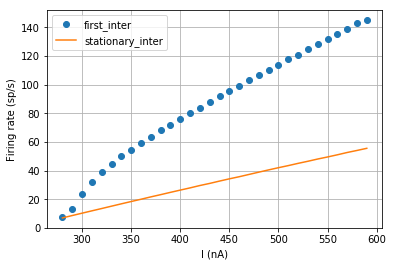

In [21]:
#plot
input_current = [None]*len(current)

plt.figure(1)

first_inter = [None]*len(current)
stationary_inter = [None]*len(current)
for i in range(len(current)):
    first_inter[i] = 1/(float(spike_monitor.spike_trains()[i][2])
                        - float(spike_monitor.spike_trains()[i][1]))
    
    stationary_inter[i] = 1/(float(spike_monitor.spike_trains()[i][-2])
                            - float(spike_monitor.spike_trains()[i][-3]))

#plt.plot(neuron.current/b2.pA, spike_monitor.count/simulation_time, '*', label='count')
plt.plot(neuron.current/b2.pA, first_inter/b2.second, 'o', label='first_inter')
plt.plot(neuron.current/b2.pA, stationary_inter/b2.second, label='stationary_inter')
plt.xlabel('I (nA)')
plt.ylabel('Firing rate (sp/s)')
plt.legend()
plt.grid()
plt.show()